<a href="https://colab.research.google.com/github/isan23/Python-Weekly-Tasks/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)

from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

df = pd.read_csv('/content/Diabetes_ANN.csv')

Class counts:
Outcome
1    3320
0    1680
Name: count, dtype: int64


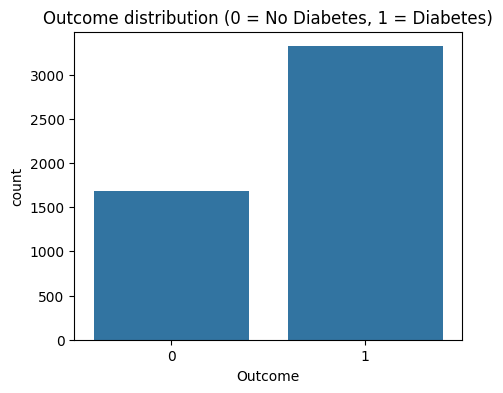

In [ ]:
print("Class counts:")
print(df['Outcome'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome distribution (0 = No Diabetes, 1 = Diabetes)')
plt.show()


In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Training shape:", X_train.shape)
print("Testing shape :", X_test.shape)


Training shape: (4000, 8)
Testing shape : (1000, 8)


=== Logistic Regression Results ===
Accuracy : 0.6640
Precision: 0.6640
Recall   : 1.0000
F1-Score : 0.7981

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.66      1.00      0.80       664

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.44      0.66      0.53      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


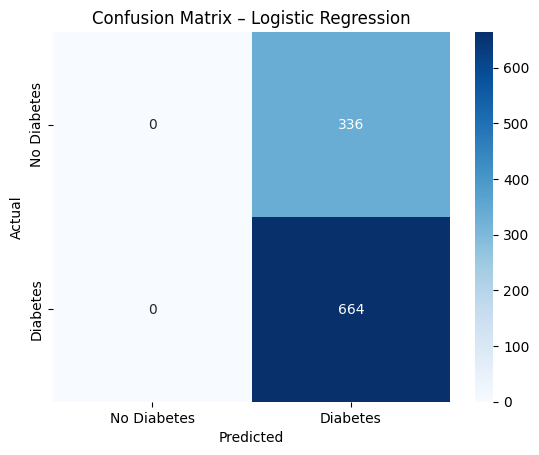

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)

# Evaluation
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("=== Logistic Regression Results ===")
print(f"Accuracy : {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall   : {rec_log:.4f}")
print(f"F1-Score : {f1_log:.4f}")
print("\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()


In [ ]:
# Build the ANN
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(X_train_scaled, y_train,
                    epochs=100, batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop], verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5201 - loss: 1.0851 - val_accuracy: 0.6000 - val_loss: 0.8567
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6017 - loss: 0.8872 - val_accuracy: 0.6363 - val_loss: 0.8097
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6091 - loss: 0.8313 - val_accuracy: 0.6500 - val_loss: 0.7815
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6414 - loss: 0.7773 - val_accuracy: 0.6500 - val_loss: 0.7598
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6592 - loss: 0.7575 - val_accuracy: 0.6500 - val_loss: 0.7415
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6671 - loss: 0.7315 - val_accuracy: 0.6500 - val_loss: 0.7259
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6691 - loss: 0.7113 - val_accuracy: 0.6500 - val_loss: 0.7134
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6618 - loss: 0.7055 - val_acc

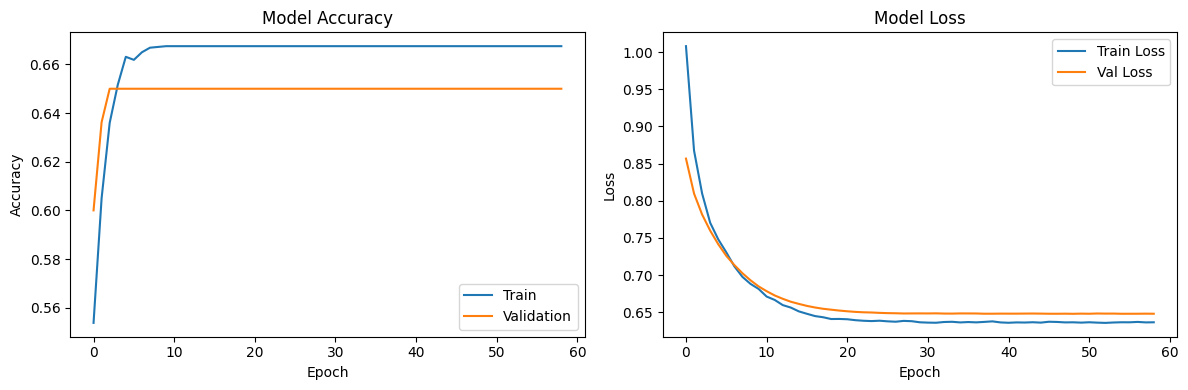

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.tight_layout(); plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
=== ANN Results ===
Accuracy : 0.6640
Precision: 0.6640
Recall   : 1.0000
F1-Score : 0.7981

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.66      1.00      0.80       664

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.44      0.66      0.53      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


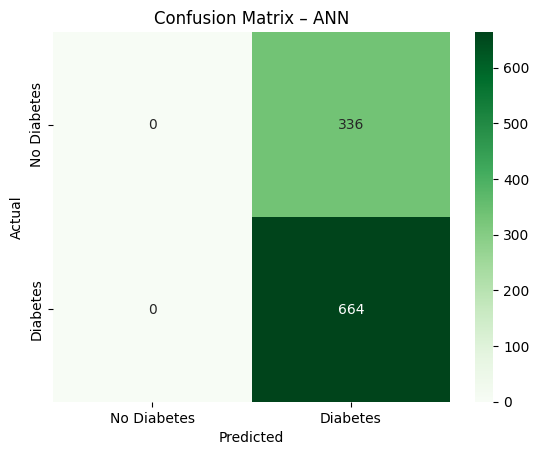

In [ ]:
y_proba_ann = model.predict(X_test_scaled)
y_pred_ann = (y_proba_ann > 0.5).astype(int)

acc_ann = accuracy_score(y_test, y_pred_ann)
prec_ann = precision_score(y_test, y_pred_ann)
rec_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)

print("=== ANN Results ===")
print(f"Accuracy : {acc_ann:.4f}")
print(f"Precision: {prec_ann:.4f}")
print(f"Recall   : {rec_ann:.4f}")
print(f"F1-Score : {f1_ann:.4f}")
print("\n", classification_report(y_test, y_pred_ann))

# Confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Confusion Matrix – ANN')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()


In [ ]:
compare = pd.DataFrame({
    'Model':['Logistic Regression','ANN'],
    'Accuracy':[acc_log, acc_ann],
    'Precision':[prec_log, prec_ann],
    'Recall':[rec_log, rec_ann],
    'F1-Score':[f1_log, f1_ann]
})
compare


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.664,0.664,1.0,0.798077
1,ANN,0.664,0.664,1.0,0.798077
